In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Adult%20Salary.csv")

# Q1 What is the size of the dataset (number of rows and columns)?

In [ ]:
df.shape

(48842, 10)

# Q2 What are the column names and their data types?

In [ ]:
df.dtypes

Age               int64
Gender           object
WorkingClass     object
Education        object
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
NativeCountry    object
Income           object
dtype: object

# Q3 Are there any missing values in the dataset?

In [ ]:
df.isnull().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

**there are no missing value**

# Q4 How many unique values are there in the 'Education' column?

In [ ]:
df["Education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

# Q5 How many unique values are in each column?

In [ ]:
unique_count = df.nunique()
unique_count

Age              74
Gender            2
WorkingClass      9
Education        16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
NativeCountry    42
Income            2
dtype: int64

# Q6 What are the minimum and maximum values for numerical columns?

In [ ]:
df.min()

Age                              17
Gender                       Female
WorkingClass                      ?
Education                      10th
MaritalStatus              Divorced
Occupation                        ?
Relationship                Husband
Race             Amer-Indian-Eskimo
NativeCountry                     ?
Income                        <=50K
dtype: object

In [ ]:
df.max()

Age                            90
Gender                       Male
WorkingClass          Without-pay
Education            Some-college
MaritalStatus             Widowed
Occupation       Transport-moving
Relationship                 Wife
Race                        White
NativeCountry          Yugoslavia
Income                       >50K
dtype: object

# Q7 What is the distribution of genders in the dataset?

In [ ]:
df["Gender"].value_counts()

Male      32650
Female    16192
Name: Gender, dtype: int64

# Q8 What is the most common occupation in the dataset?

In [ ]:
df["Occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: Occupation, dtype: int64

# Q9 What are the summary statistics (mean, median, min, max, etc.) for numerical columns?

In [ ]:
df.describe()

,Age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


# Q10 Are there any missing values in the dataset? If so, which columns have missing values?

In [ ]:
missing_value = df.isnull().sum()
missing_value

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

# Q11 How can you handle the missing values in the dataset? (Drop rows, fill with a specific value, etc.)

**1) Drop row with missing value**

In [ ]:
a = df.dropna()

**2) Filling with a Specific Value**

In [ ]:
mean_value = df["Column_name"].mean()
data_filled = df.fillna({"Column_name" : mean_value})

In [ ]:
data_fill = df.ffill()                 # forward filling
data_fill = df.bfill()                 # Backward filling

**3) Interpolation**

*   If your data has a pattern or trend, you can use interpolation methods like linear or polynomial to estimate missing values based on existing values.




In [ ]:
data_interpolated = df.interpolate(method = "linear")

# Q12 Are there any duplicate rows in the dataset? How can you identify and remove them?

In [ ]:
print("Original dataset : ",df.shape)

Original dataset :  (48842, 10)


In [ ]:
duplicate_row = df[df.duplicated()]

print("Duplicate : ",duplicate_row.shape)

Duplicate :  (16796, 10)


In [ ]:
df.drop_duplicates()

(48842, 10)

# Q13 What is the average age of individuals in the dataset?

In [ ]:
df.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

In [ ]:
df["Age"].mean()

38.64358543876172

# Q14 What is the highest education level attained by any individual?

In [ ]:
df["Education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: Education, dtype: int64

# Q15 What is the median capital gain among individuals with a Bachelor's degree?

In [ ]:
df.head(3)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K


In [ ]:
a = df.groupby('Education')["Income"].value_counts()
a

Education     Income
10th          <=50K      1302
              >50K         87
11th          <=50K      1720
              >50K         92
12th          <=50K       609
              >50K         48
1st-4th       <=50K       239
              >50K          8
5th-6th       <=50K       482
              >50K         27
7th-8th       <=50K       893
              >50K         62
9th           <=50K       715
              >50K         41
Assoc-acdm    <=50K      1188
              >50K        413
Assoc-voc     <=50K      1539
              >50K        522
Bachelors     <=50K      4712
              >50K       3313
Doctorate     >50K        431
              <=50K       163
HS-grad       <=50K     13281
              >50K       2503
Masters       >50K       1459
              <=50K      1198
Preschool     <=50K        82
              >50K          1
Prof-school   >50K        617
              <=50K       217
Some-college  <=50K      8815
              >50K       2063
Name: Income, dtype

# Q16 What is the occuption for people with income above $50,000?

In [ ]:
high_income_occuption = df[df["Income"]==">50K"]["Occupation"]
high_income_occuption.value_counts()

Exec-managerial      2908
Prof-specialty       2784
Sales                1475
Craft-repair         1383
Adm-clerical          768
Transport-moving      481
Tech-support          420
Machine-op-inspct     372
Protective-serv       308
?                     265
Other-service         204
Farming-fishing       173
Handlers-cleaners     138
Armed-Forces            5
Priv-house-serv         3
Name: Occupation, dtype: int64

# Q17 What is the distribution of categorical variables?

In [ ]:
df.head(1)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K


In [ ]:
categorical_value = ["Gender","Occupation","MaritalStatus","Education","NativeCountry","WorkingClass","Relationship","Race","Income"]

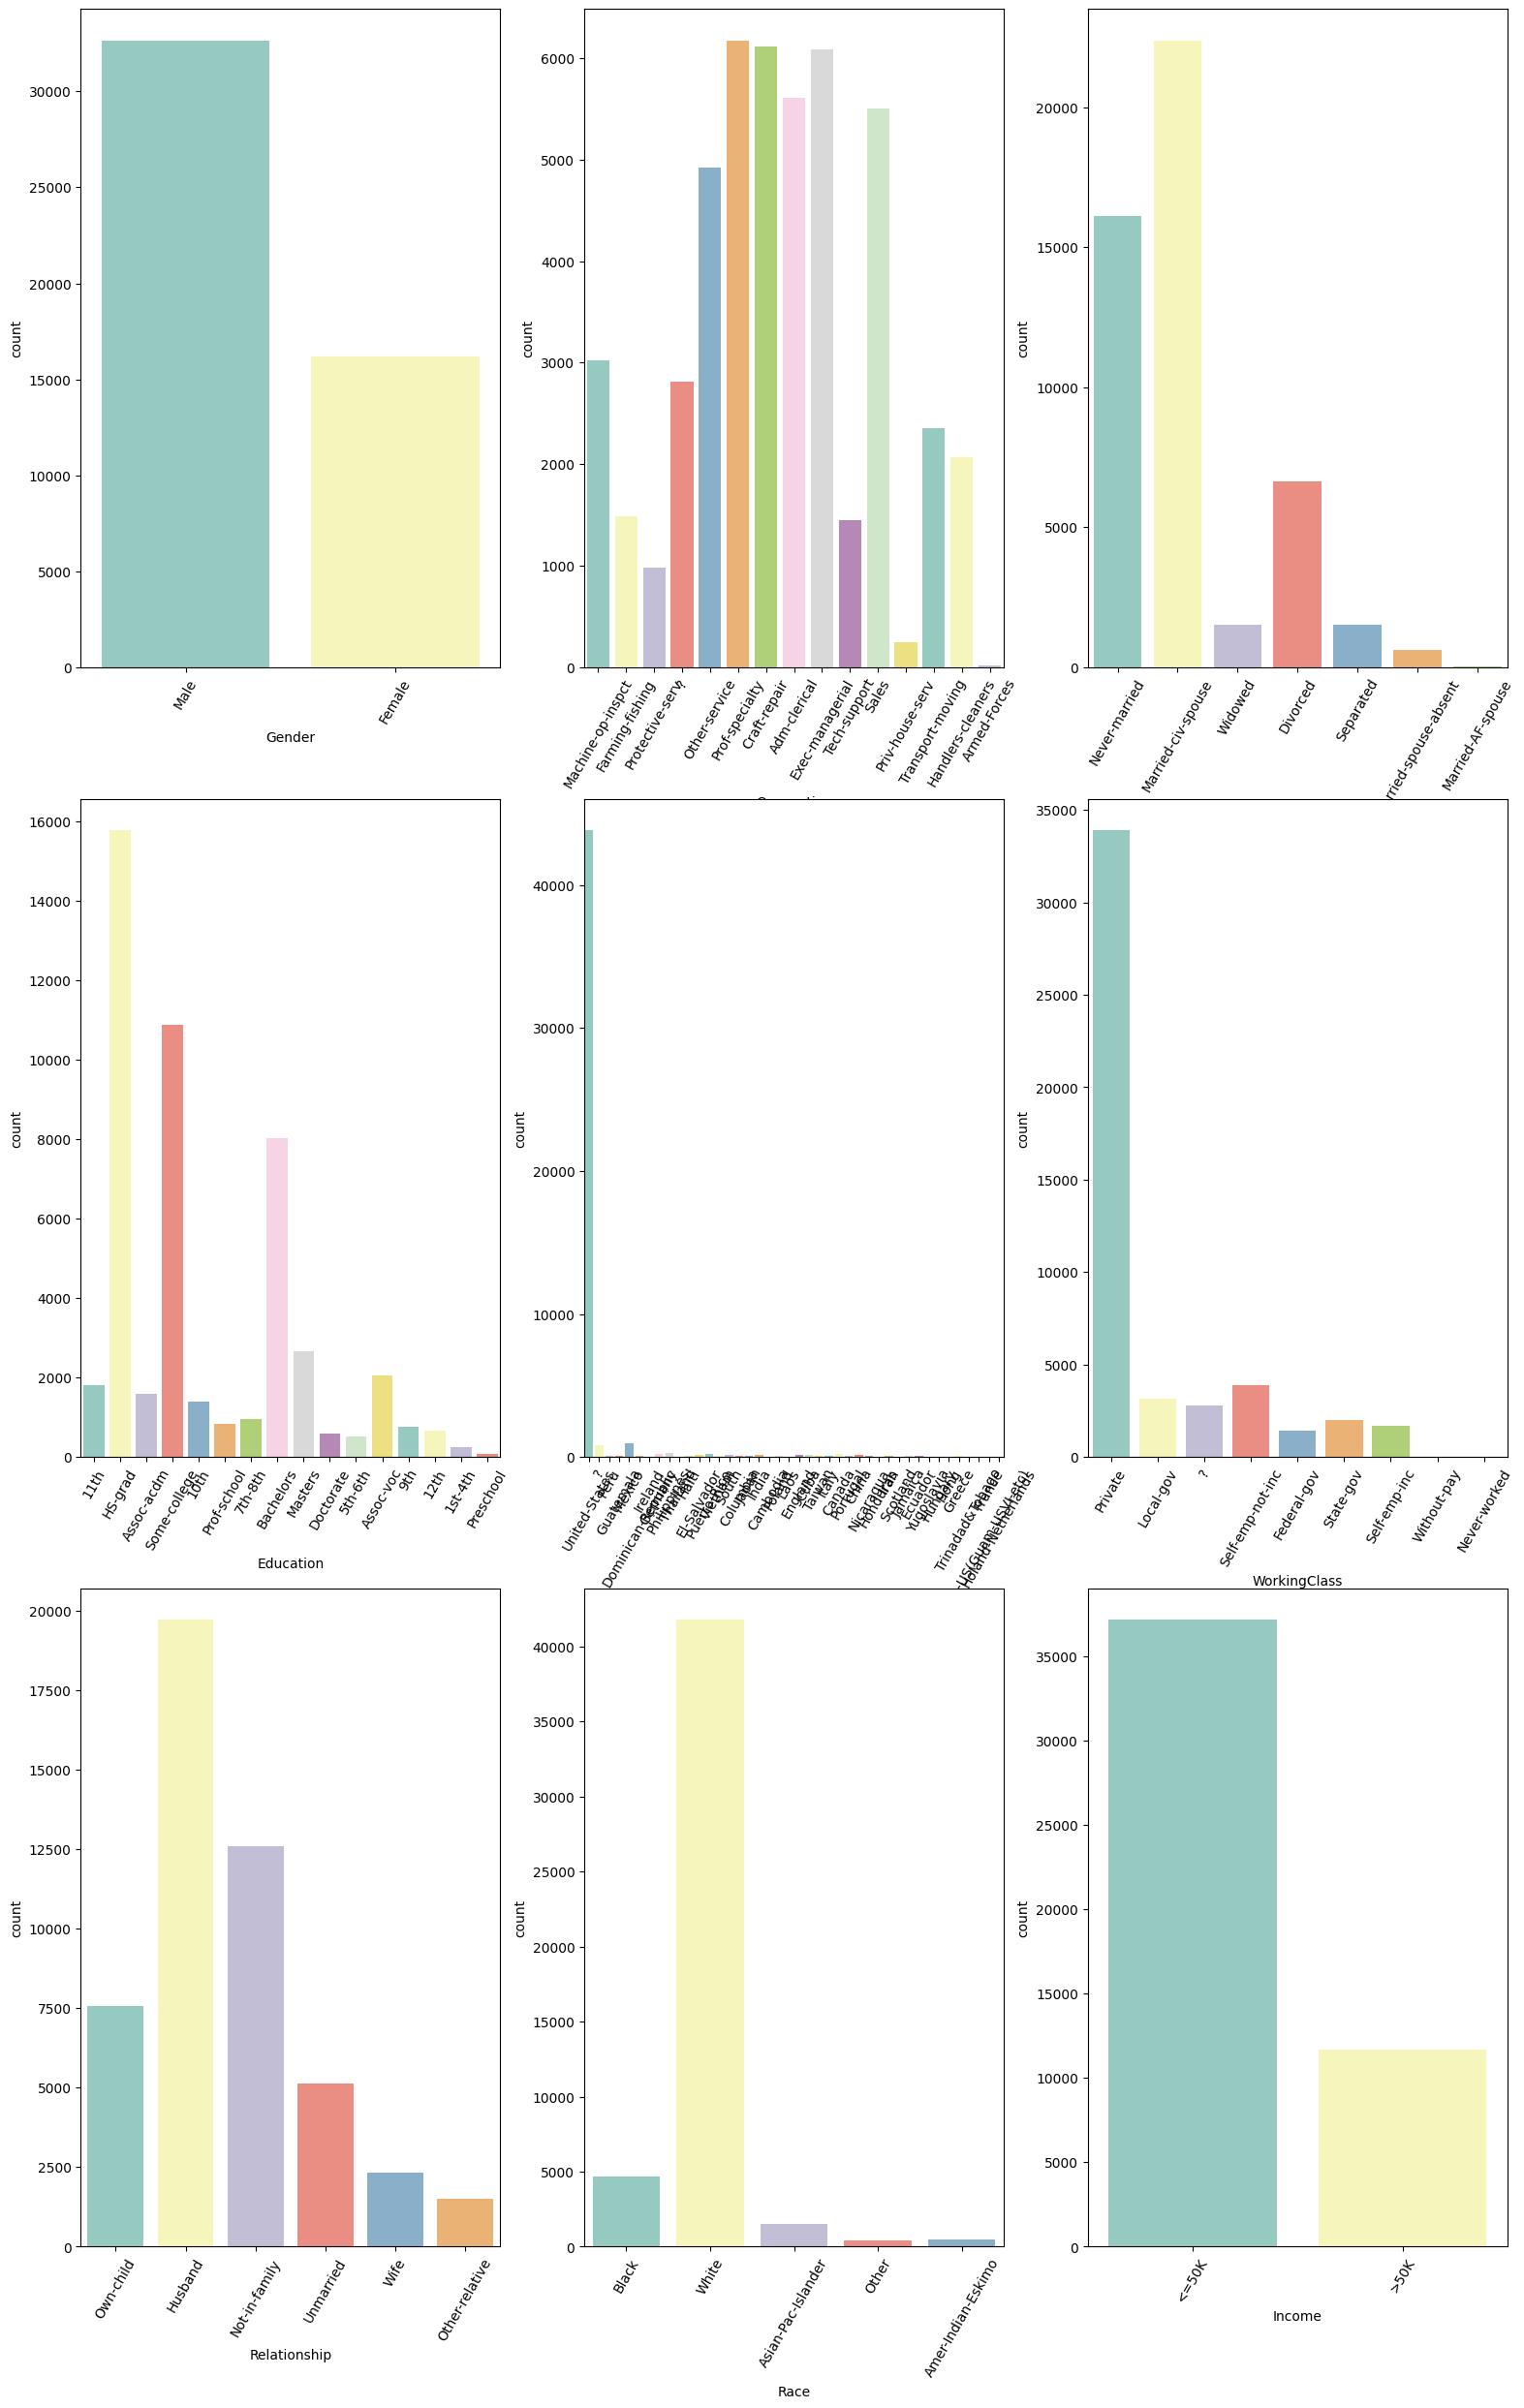

In [ ]:
plt.figure(figsize = (19,30))

for i , column in enumerate(categorical_value,1):
  plt.subplot(3,3,i)
  sns.countplot(data = df , x = column , palette = "Set3")
  plt.xticks(rotation = 60)

# Q18 What are the 25th and 75th percentiles for numerical columns?

In [ ]:
df.describe()

,Age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


# Q19 Are there any outliers in the numerical variables? How will you handle them?

In [ ]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outlier = (df["Age"] < lower_bound) | (df["Age"] > upper_bound)
print("outlier counts : ",outlier.sum())
print(outlier.value_counts())


outlier counts :  157
False    48685
True       157
Name: Age, dtype: int64


**removal of outlier**

In [ ]:

outlier_remove = ((df["Age"] >= lower_bound) & (df["Age"] <= upper_bound))
print("Number of Outlier remove : ",(~outlier_remove).sum())

Number of Outlier remove :  373


# Q20 Create a bar chart showing the distribution of education levels in the dataset.

**1) using Ploty express px**

In [ ]:
education_count = df["Education"].value_counts().reset_index()
education_count

,index,Education
0,HS-grad,15784
1,Some-college,10878
2,Bachelors,8025
3,Masters,2657
4,Assoc-voc,2061
5,11th,1812
6,Assoc-acdm,1601
7,10th,1389
8,7th-8th,955
9,Prof-school,834


In [ ]:
print("Old column name :",education_count.columns)

new_column = { "index" : "Educations","Education":"Count"}

education_count.rename(columns = new_column , inplace = True )

print("New column name : ",education_count.columns)

Old column name : Index(['index', 'Education'], dtype='object')
New column name :  Index(['Educations', 'Count'], dtype='object')


In [ ]:
barGraph = px.bar(education_count  , x = "Educations" , y = "Count", title = "Distribution of education levels in the dataset")
barGraph.show()

**2) using seaborn sns and matplotlib**

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style = "whitegrid")

<Figure size 1000x600 with 0 Axes>

In [ ]:
e1 = df["Education"].value_counts().sort_values(ascending = False)


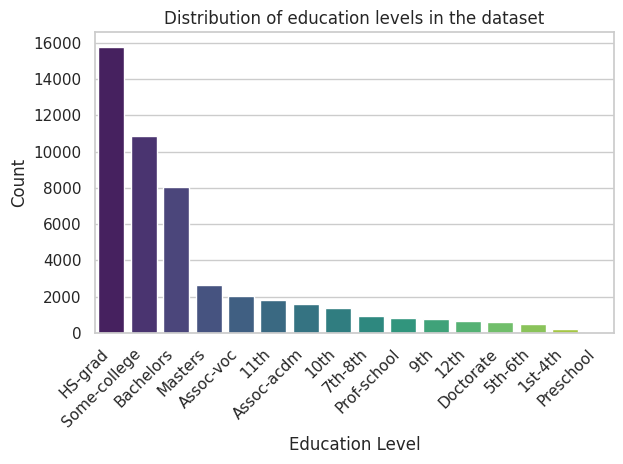

In [ ]:
sns.barplot(x = e1.index , y = e1.values , palette = "viridis")
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of education levels in the dataset")
plt.tight_layout()
plt.show()

# Q21 Generate a histogram depicting the distribution of ages.

**1) using ploty express px**

In [ ]:
age_histo = px.histogram(df, x = "Age" , nbins = 20 , title = "Distribution of ages")
age_histo.update_layout(yaxis_title = "Frequency")
age_histo.show()

**2) using seaborn and matplotlib**

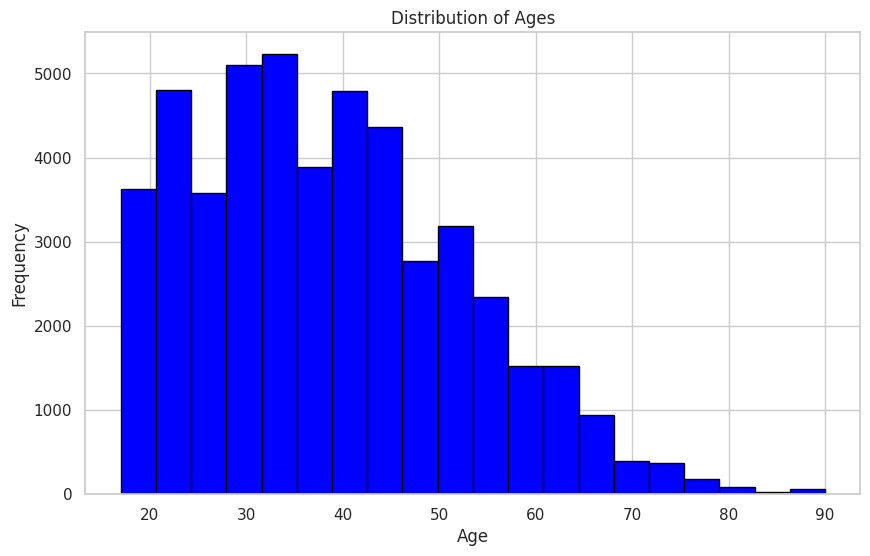

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(df["Age"] , bins = 20, color = "blue" , edgecolor = "black")
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q22 Create a pie chart showing the proportion of different marital statuses.

In [ ]:
df.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

**1) using matplotlib**

In [ ]:
marriage_status = df["MaritalStatus"].value_counts()

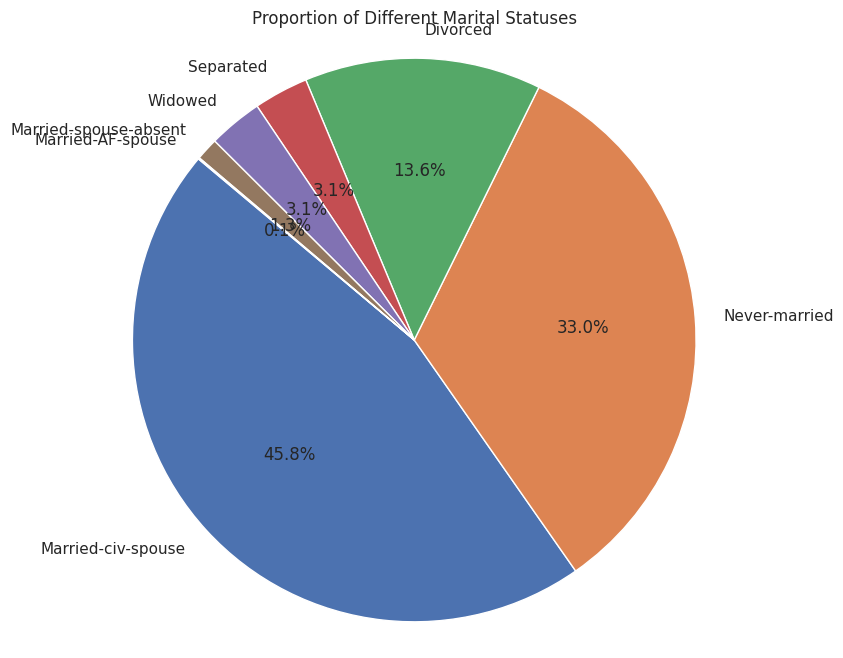

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(marriage_status , labels=marriage_status.index , autopct = '%1.1f%%', startangle=140 )
plt.title("Proportion of Different Marital Statuses")
plt.axis('equal')
plt.show()

**2) using px**


In [ ]:
a = df["MaritalStatus"].value_counts().reset_index()
a.columns

Index(['index', 'MaritalStatus'], dtype='object')

In [ ]:
b = {"index" : "Marriage Status", "MaritalStatus" : "Count"}
a.rename(columns = b , inplace = True)
a.columns

Index(['Marriage Status', 'Count'], dtype='object')

In [ ]:
fig = px.pie(a , values = "Count" , names = "Marriage Status" , title='Proportion of Different Marital Statuses', labels={'Count': 'Count'})
fig.show()

# Q23 How many individuals are older than 60 years?

In [ ]:
df["Age"].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [ ]:
b = df[df["Age"] > 60]
b.shape

(3606, 10)

# Q24 What is the average age for each education level?

In [ ]:
df.groupby("Education")["Age"].mean()


Education
10th            37.902808
11th            32.141832
12th            32.235921
1st-4th         46.639676
5th-6th         43.585462
7th-8th         49.525654
9th             40.902116
Assoc-acdm      37.777014
Assoc-voc       38.651140
Bachelors       38.896324
Doctorate       47.530303
HS-grad         39.073809
Masters         44.006775
Preschool       42.204819
Prof-school     45.152278
Some-college    35.677055
Name: Age, dtype: float64

# Q25 What is the maximum capital gain for different marital statuses?

In [ ]:
df.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

In [ ]:
df.groupby("MaritalStatus")["Income"].value_counts()

MaritalStatus          Income
Divorced               <=50K      5962
                       >50K        671
Married-AF-spouse      <=50K        23
                       >50K         14
Married-civ-spouse     <=50K     12395
                       >50K       9984
Married-spouse-absent  <=50K       570
                       >50K         58
Never-married          <=50K     15384
                       >50K        733
Separated              <=50K      1431
                       >50K         99
Widowed                <=50K      1390
                       >50K        128
Name: Income, dtype: int64

# Q26 What is the percentage of individuals earning more than $50,000 among those with a Bachelor's degree?

In [ ]:
bachelor_with_high_income = df[(df["Income"] ==">50K") & (df["Education"]== "Bachelor")]

total_bachelor = df[df["Education"] == "Bachelor"]

if len(total_bachelor) > 0:
  ans = (len(bachelor_with_high_income) / len(total_bachelor)) * 100
  print(ans)

else :
  print('No individuals with a Bachelor degree found in the dataset')

No individuals with a Bachelor degree found in the dataset


# Q27 What is the average age of females with income less than or equal to $50,000?

In [ ]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [ ]:
female_with_low_income = df[(df["Gender"] == "Female") & (df["Income"] == "<=50K")]

ans = female_with_low_income["Age"].mean()

print("Average age of females with income less than or equal to $50,000 ====> ", ans)

Average age of females with income less than or equal to $50,000 ====>  36.27899882132705


# Q28 Group ages into categories (e.g., young, middle-aged, senior) and analyze the income distribution.

In [ ]:
age_categories = ["Young","Middle age", "Senior"]
age_bin = [0,30,60,float('inf')]

In [ ]:
df["Age_Category"] = pd.cut(df["Age"] , bins = age_bin , labels = age_categories , right = False)
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income,Age_Category
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K,Young
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K,Middle age
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K,Young
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K,Middle age
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K,Young


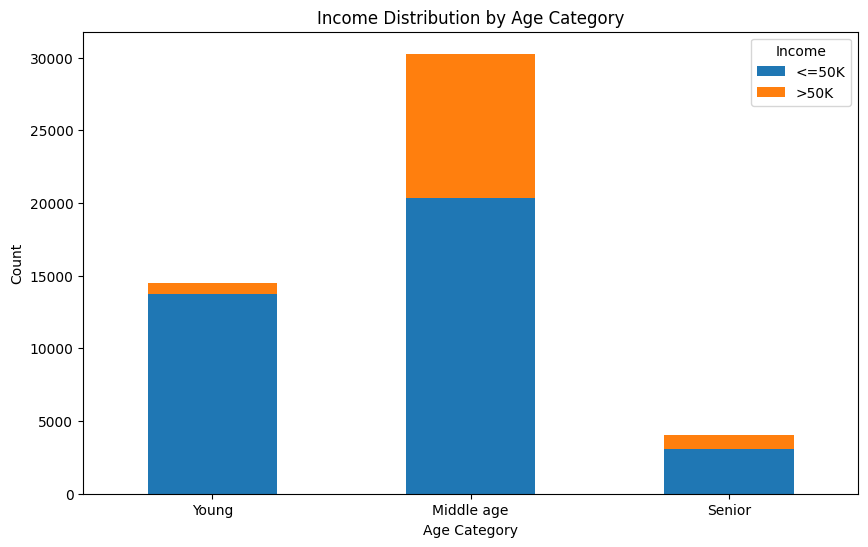

In [ ]:
income_by_age_category = df.groupby(["Age_Category","Income"])["Income"].count().unstack()

income_by_age_category.plot(kind = "bar" ,stacked = True ,  figsize = (10,6))
plt.title('Income Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation = 0)
plt.show()
